In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

Load the BC Dissemination Block attributes and create point geometries from their representative points. The geometries are projected from Stats Canada Lambert (EPSG:3347) to BC Albers (EPSG:3005) 

In [2]:
population_data = pd.read_csv('./Data/DB_attr/BC_DB_attr.csv')
population_data['geometry'] = [Point(db[9],db[10]) for db in population_data.itertuples()]

spatial_population_data = gpd.GeoDataFrame(population_data)
spatial_population_data.crs = {'init' :'epsg:3347'}
spatial_population_data = spatial_population_data.to_crs({'init': 'epsg:3005'})

In [3]:
bus_stop_data = pd.read_csv('./Data/StopLocations/stops.txt')
bus_stop_data['geometry'] = [Point(stop[4],stop[3]) for stop in bus_stop_data.itertuples()]

spatial_bus_stop_data = gpd.GeoDataFrame(bus_stop_data)
spatial_bus_stop_data.crs = {'init': 'epsg:4326'}
spatial_bus_stop_data = spatial_bus_stop_data.to_crs({'init' :'epsg:3005'})

As a sanity check plot the representative points on the Dissemination Block geometry to make sure we don't have any glaring omissions

In [4]:
db_shapes = gpd.read_file('./Data/DB_shape/BC_DB_shape_2016.shp')
db_shapes.crs = {'init' :'epsg:3347'}
db_shapes = db_shapes.to_crs({'init' :'epsg:3005'})

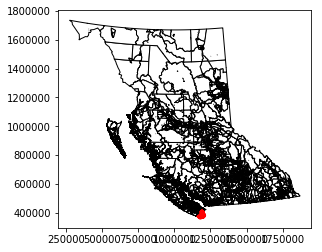

In [5]:
base = db_shapes.plot(color='white',edgecolor='black')
spatial_bus_stop_data.plot(ax=base, marker='o', color='red', markersize=5)